In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction import *
from matplotlib.animation import FuncAnimation
from scipy.interpolate import UnivariateSpline
from Visualisation.qnm_vis import * 
from qnmfitsrd.CCE_file_getter import *
import datetime

In [2]:
sim = CCE_to_sim_high_res(sim_num='0010')

In [ ]:
model = [(l,0,n,p) for l in range(2, 9) for n in range(0,3) for p in [-1,1]] 

best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,0],
    model,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=20
    )

In [3]:
modes = [(2,0,0,1), (2,0,1,1), (2,0,0,-1), (2,0,1,-1)] 

t0 = [20, 30, 40, 40]

best_fit_dst = qnmfits.ringdown_fit_dst(
    sim.times,
    sim.h[2,0],
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=t0
)

best_fit = qnmfits.ringdown_fit(
    sim.times,
    sim.h[2,0],
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=20
    )

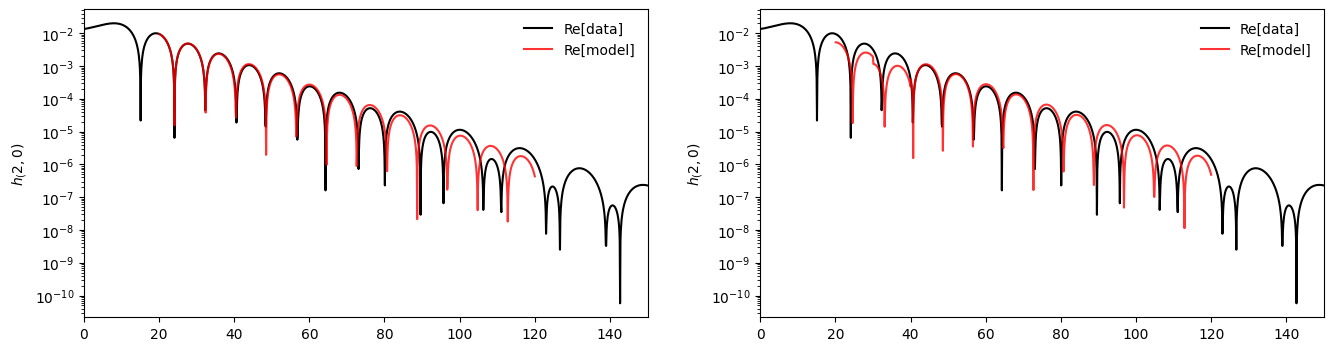

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

data = sim.h[2,0]
data = np.real(data)

model_data = best_fit['model']
model_data = np.real(model_data)

ax[0].plot(sim.times, abs(data), 'k-', label='Re[data]')
ax[0].plot(
    best_fit['model_times'], abs(model_data), 'r-', label='Re[model]', 
    alpha=0.8
    )

model_data_dst = best_fit_dst['model']
model_data_dst = np.real(model_data_dst)

ax[1].plot(sim.times, abs(data), 'k-', label='Re[data]')
ax[1].plot(
    best_fit['model_times'], abs(model_data_dst), 'r-', label='Re[model]', 
    alpha=0.8
    )

ax[0].set_ylabel(f'$h_{2,0}$')
ax[1].set_ylabel(f'$h_{2,0}$')
ax[0].set_xlim(0,150)
ax[1].set_xlim(0,150)

ax[0].set_yscale('log')
ax[1].set_yscale('log')    

ax[0].legend(frameon=False)
ax[1].legend(frameon=False)

plt.show() 